In [1]:
#Instalo e importo paquetes 
!pip install pandas

import pandas as pd 
import numpy as np 
import os

from IPython.display import Image, display, HTML
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
import seaborn as sns

import statsmodels.api as sm     

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# librerias de métricas de performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from scipy import stats
from ISLP import load_data
from scipy.stats import ttest_ind

from sklearn.neighbors import KNeighborsClassifier



In [2]:
## Base total de EPH depurada en TP3  ##############

union_eph = pd.read_excel('union_eph.xlsx')
#union_eph

In [3]:
# Hay duplicados?
print("Duplicados:", union_eph.duplicated().sum())

# Eliminar duplicados y mantener solo la primera ocurrencia
union_eph_sd = union_eph.drop_duplicates()

# Hay duplicados?
print("Duplicados:", union_eph_sd.duplicated().sum())


# Hay valores faltantes?
#print("\n Missings:\n", union_eph.isnull().sum()) # conteo
#print(union_eph.isnull().mean() * 100) # como porcentaje


Duplicados: 348
Duplicados: 0


In [4]:

# Contenido HTML que deseas mostrar
html_txt = """
<h3 style="color: navy">A. Enfoque de validación </h3>
<p> 
Utilicen la base respondieron. Para cada año, dividan las observaciones en una base de prueba (test) y una de entrenamiento (train) <br>
utilizando el comando train_test_split. <br>
La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 444. <br>
Establezca a pobre como su variable dependiente en la base de entrenamiento (vector y). <br>
El resto de las variables seleccionadas serán las variables independientes (matriz X). <br>
Recuerden agregar la columna de unos (1) para el intercepto. <br>
Aclaración: no incluir la variable ingreso en X para predecir la pobreza <br>
porque cuando vayamos a la base de norespondieron no vamos a tener esa información. 
</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))





In [5]:
# Contenido HTML que deseas mostrar
html_txt = """
<h3 style="color: navy">A1 </h3>
<p> 
Para la matriz de las X seleccione variables que hayan limpiado en los TPs anteriores y justifique su inclusión para predecir la pobreza. <br>

Cree una tabla de diferencia de medias entre la base de entrenamiento y la de testeo de las características seleccionadas en su matriz X.<br> 

Comente la tabla de la diferencia de medias de sus variables entre entrenamiento y testeo. <br>

¿Hay diferencias significativas entre las medias del entrenamiento y testeo? 
</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))

In [6]:
html_txt = """
<h3 style="color: navy">Rta A1 </h3>
<p> 
Para predecir la pobreza, la matriz X, debe incluir los siguietes Predictores:<br>
'CH06'=EDAD, 'NIVEL_ED'=Nivel Educativo  <br>
La EDAD es un factor relevante dado el ciclo de ingresos durante las diferentes etapas de la vida<br>
El nivel educativo de los integrantes del hogar podrían estar correlacionados e influye en los puestos de trabajo en los que se insertan por lo que podría tener una porcion explicativa <br>
La situación laboral podría ofrecer algun nivel explicativo dado que influye en el flujo de ingresos

</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))

In [7]:
# Filtrar filas donde 'ITF' no es igual a 0
union_eph_resp = union_eph_sd[union_eph_sd['ITF'] != 0]

#Por AÑOS
union_eph_resp_2005 = union_eph_resp[union_eph_resp['ANIO'] == 2005]
union_eph_resp_2025 = union_eph_resp[union_eph_resp['ANIO'] == 2025]


# Filtrar filas donde 'ITF' es igual a 0
union_eph_noresp = union_eph_sd[union_eph_sd['ITF'] == 0]

#Por AÑOS
union_eph_noresp_2005 = union_eph_noresp[union_eph_noresp['ANIO'] == 2005]
union_eph_noresp_2025 = union_eph_noresp[union_eph_noresp['ANIO'] == 2025]



In [8]:
#En el armado de las variables, me quedo con los datos de la region 40, que es para quienes calculamos a los pobres.
# La variable dependiente no puede tener missing
#Se dejará afuera a las entrevistas que no informaron su estado de situacion laboral (estado=0), que son 148, ya que será dummy.

#2005
y_05 = union_eph_resp_2005.loc[(union_eph_resp_2005['REGION'] == 40) & (union_eph_resp_2005['ESTADO'] != 0), ['pobre']]
x_05 = union_eph_resp_2005.loc[(union_eph_resp_2005['REGION'] == 40) & (union_eph_resp_2005['ESTADO'] != 0), ['CH06', 'NIVEL_ED']]

#2025
y_25 = union_eph_resp_2025.loc[(union_eph_resp_2025['REGION'] == 40) & (union_eph_resp_2025['ESTADO'] != 0), ['pobre']]
x_25 = union_eph_resp_2025.loc[(union_eph_resp_2025['REGION'] == 40) & (union_eph_resp_2025['ESTADO'] != 0), ['CH06', 'NIVEL_ED']]


#Reseteo el index para que no queden agujeros por lo quitado hasta aquí

union_eph_resp_2005 = union_eph_resp_2005.reset_index(drop=True)
union_eph_resp_2025 = union_eph_resp_2025.reset_index(drop=True)


#Hay que verificar las dimensiones porque train_test_split necesita igual nro de filas

print("Dimensiones de x_05:", x_05.shape)
print("Dimensiones de y_05:", y_05.shape)

print("Dimensiones de x_25:", x_25.shape)
print("Dimensiones de y_25:", y_25.shape)

# Hay valores faltantes?
print("\n Missings:\n", y_25.isnull().sum()) 
print("\n Missings:\n", y_05.isnull().sum())
# conteo
#print(auto.isnull().mean() * 100) # como porcentaje


Dimensiones de x_05: (9089, 2)
Dimensiones de y_05: (9089, 1)
Dimensiones de x_25: (8630, 2)
Dimensiones de y_25: (8630, 1)

 Missings:
 pobre    0
dtype: int64

 Missings:
 pobre    0
dtype: int64


In [9]:
# Convierto a las variables categoricas en variables dummies por cada una de sus categorias

x_05_c_dummy = pd.get_dummies(x_05, columns=['NIVEL_ED'])
x_25_c_dummy = pd.get_dummies(x_25, columns=['NIVEL_ED'])

x_05_c_dummy
# x_25_c_dummy

,CH06,NIVEL_ED_1,NIVEL_ED_2,NIVEL_ED_3,NIVEL_ED_4,NIVEL_ED_5,NIVEL_ED_6,NIVEL_ED_7
54545,36,False,False,True,False,False,False,False
54546,35,False,True,False,False,False,False,False
54547,15,False,False,True,False,False,False,False
54548,12,False,False,True,False,False,False,False
54549,10,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
63784,10,True,False,False,False,False,False,False
63785,31,False,False,False,False,False,True,False
63786,29,False,False,False,False,False,True,False
63787,4,False,False,False,False,False,False,True


In [10]:

#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP4-Grupo3'

#2005
# Asi se llamara el excel
archivo_nombre = "y_train_2025.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
y_train_2025.to_excel(destino, index=False)
##############################################################
#2025

archivo_nombre = "y_test_2025.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

y_test_2025.to_excel(destino, index=False)


NameError: name 'y_train_2025' is not defined

In [11]:

# Una vez seleccionado, y limpiado, a las variables podemos particionar la base en entrenamiento (train) y testeo (test) 

#union_eph_resp_2005 
x_train_2005, x_test_2005, y_train_2005, y_test_2005 = train_test_split(x_05_c_dummy, y_05, test_size=0.7, random_state=444)

#union_eph_resp_2025
x_train_2025, x_test_2025, y_train_2025, y_test_2025 = train_test_split(x_25_c_dummy, y_25, test_size=0.7, random_state=444)


In [ ]:
html_txt = """
<p> 
No hay evidencia de diferencias estadísticamente significativas entre los valores de entrenamiento y prueba para ninguna variable, ni en 2005 ni en 2025.
Los p-values son todos mayores a 0.05 y los valores de t-test son cercanos a cero, lo que indica que las medias son similares.<br>
Está distribuido de forma similar ya que no se encuentran diferencias significativas entre las particiones de entrenamiento y testeo porque las diferencias rondan al 1%.<br>
Es bueno para que el modelo generalice bien y no esté sesgado por diferencias en la proporción entre train y test.
</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))

In [12]:

# Lista explícita de columnas relevantes
columnas_x = [
    'CH06',
    'NIVEL_ED_1', 'NIVEL_ED_2', 'NIVEL_ED_3', 'NIVEL_ED_4',
    'NIVEL_ED_5', 'NIVEL_ED_6', 'NIVEL_ED_7'
]

def tabla_diferencia_medias(x_train, x_test, columnas):
    # Filtramos solo las columnas relevantes
    x_train_filtrado = x_train[columnas]
    x_test_filtrado = x_test[columnas]
    
    # Calculamos medias
    medias_train = x_train_filtrado.mean()
    medias_test = x_test_filtrado.mean()
    
    # Creamos tabla
    tabla = pd.DataFrame({
        'Media Train': medias_train,
        'Media Test': medias_test,
        'Diferencia (Train - Test)': medias_train - medias_test
    })
    
    return tabla.round(4)

tabla_2005 = tabla_diferencia_medias(x_train_2005, x_test_2005, columnas_x)
tabla_2025 = tabla_diferencia_medias(x_train_2025, x_test_2025, columnas_x)

tabla_2025


,Media Train,Media Test,Diferencia (Train - Test)
CH06,35.5716,35.4918,0.0798
NIVEL_ED_1,0.1356,0.1323,0.0033
NIVEL_ED_2,0.1024,0.1058,-0.0034
NIVEL_ED_3,0.1993,0.1945,0.0048
NIVEL_ED_4,0.2240,0.2322,-0.0082
NIVEL_ED_5,0.1622,0.1490,0.0132
NIVEL_ED_6,0.1263,0.1303,-0.0040
NIVEL_ED_7,0.0502,0.0560,-0.0057


In [ ]:
tabla_2005

In [13]:

# Transformo para que x_train y x_test sean DataFrames con nombres de columnas

x_train_05 = pd.DataFrame(x_train_2005, columns=['const', 'CH06'] + [f'NIVEL_ED_{i}' for i in range(1, 8)])
x_train_25 = pd.DataFrame(x_train_2025, columns=['const', 'CH06'] + [f'NIVEL_ED_{i}' for i in range(1, 8)])

x_test_05 = pd.DataFrame(x_test_2005, columns=['const', 'CH06'] + [f'NIVEL_ED_{i}' for i in range(1, 8)])
x_test_25 = pd.DataFrame(x_test_2025, columns=['const', 'CH06'] + [f'NIVEL_ED_{i}' for i in range(1, 8)])

# Estadísticos por columna

estadisticos_x = pd.DataFrame({
    'N train 2005': x_train_05.shape[0],
    'Mean train 2005': x_train_05.mean(),
    'sd train 2005': x_train_05.std(),
    'N test 2005': x_test_05.shape[0],
    'Mean test 2005': x_test_05.mean(),
    'sd test 2005': x_test_05.std(),

    'N train 2025': x_train_25.shape[0],
    'Mean train 2025': x_train_25.mean(),
    'sd train 2025': x_train_25.std(),
    'N test 2025': x_test_25.shape[0],
    'Mean test 2025': x_test_25.mean(),
    'sd test 2025': x_test_25.std(),
})



# t-test por cada columna de X
t_tests_x_05 = x_train_05.columns.to_series().apply(
    lambda col: stats.ttest_ind(x_train_05[col], x_test_05[col], equal_var=False)
)

t_tests_x_25 = x_train_25.columns.to_series().apply(
    lambda col: stats.ttest_ind(x_train_25[col], x_test_25[col], equal_var=False)
)


# Agregamos t-test y p-value a estadisticos_x
estadisticos_x['t-test 05'] = t_tests_x_05.apply(lambda res: res.statistic)
estadisticos_x['t-test 25'] = t_tests_x_25.apply(lambda res: res.statistic)

estadisticos_x['p-value 05'] = t_tests_x_05.apply(lambda res: res.pvalue)
estadisticos_x['p-value 25'] = t_tests_x_25.apply(lambda res: res.pvalue)

# Redondeo
estadisticos_x = estadisticos_x.round(3)

# Define las variables como índice
#estadisticos.index = ['x_25', 'y_25']

# Exporta a Excel
estadisticos_x.to_excel('dif_medias.xlsx')

In [ ]:
html_txt = """
<h3 style="color: navy">B. Modelo de Regresion Logística</h3>
<h4 style="color: navy">B.3 - Estimación y Efectos Marginales</h4>
<p> 
Estimen una Regresión Logística usando x_train de respondieron_2025. Exporten una tabla con: <br> 
(i) los coeficientes estimados para cada variable, <br>
(ii) los errores estándar y los odd-ratios. <br>
Interpreten los resultados de la tabla. (Hint: en la clase 6 hay una ilustración de la tabla).

</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))




In [14]:
logit_model = sm.Logit(y_train_2025.astype(float),x_train_2025.astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.626616
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: pobre            Pseudo R-squared: 0.086     
Date:               2025-11-07 11:04 AIC:              3260.6155 
No. Observations:   2589             BIC:              3307.4877 
Df Model:           7                Log-Likelihood:   -1622.3   
Df Residuals:       2581             LL-Null:          -1774.1   
Converged:          1.0000           LLR p-value:      1.0325e-61
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
CH06          -0.0258    0.0026  -9.9697  0.0000  -0.0309  -0.0208
NIVEL_ED_1     0.5846    0.1199   4.8746  0.0000   0.3496   0.

In [ ]:
Interpretación: <br>  
A mayor edad, menor probabilidad de ser pobre. Por cada año adicional de edad se reduce la probabilidad de ser pobre en 2.6% aprox (1-Odds Ratio: 0.974).
<br>
Las variables categóricas: NIVEL_ED_1 a NIVEL_ED_7:Tienen coeficientes positivos, salvo el nivel de educacion 6 (superior no universitario)
lo que nos sugiere que hacer terciarios aumenta la probabilidad de ser pobre.  


In [ ]:
os.getcwd()

coef = result.params
std_err = result.bse
odds_ratios = np.exp(coef)

# Creo un DataFrame combinado con los 3
df_expo = pd.DataFrame({
    'Coeficiente': coef,
    'Error estándar': std_err,
    'Odds Ratio': odds_ratios
})

# Exporto
df_expo.to_excel('resultados_logistico.xlsx')


In [ ]:

# Estimacion de los coeficientes
print(coef)
print(std_err)
print(odds_ratios)

In [36]:
html_txt = """
<h4 style="color: navy">B.4 - Visualización</h4>
<p> 
Grafiquen la P ̂(Y=1|X) (en el eje vertical) y alguna característica numérica (en el eje horizontal). 
Comente dicho gráfico y la variable seleccionada para ilustrar la probabilidad de ser pobre según la característica seleccionada

</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))

In [39]:
html_txt = """
<h4 style="color: navy">B.4 - Comentario</h4>
<p> 
Se tomo a la variable Edad (CH06) de la matriz x_train_2025 como caracteristica númerica. En el grafico que relaciona 
a la probabilidad de que sea pobre dado la edad se puede observa una linea azul descendente, confirmando lo que se viene sosteniendo,
que a menor edad es mayor la probabilidad de ser pobre.
</p>

"""

# Mostrar el contenido HTML
display(HTML(html_txt))



In [61]:

x_train_2025_ch06=x_train_2025[['CH06']].astype(float)
y_train_2025 = np.array(y_train_2025).flatten()

# Crear y ajustar el modelo

logit_model2 = LogisticRegression(penalty=None)  # 'l1'O 'l2' si se quiere regularización
logit_model2.fit(x_train_2025_ch06, y_train_2025)


#result2 = logit_model2.fit()
#print(result2.summary2())

LogisticRegression(penalty=None)

In [62]:
# Predicciones (probabilidad) (p sobrerito)

y_pred_score_sm = logit_model2.predict_proba(x_train_2025_ch06)[:,1]  

#y_pred_score_sm = result2.predict(x_train_2025_ch06)

y_pred_score_sm

array([0.49837427, 0.46049617, 0.62237432, ..., 0.52366363, 0.511026  ,
       0.39252209])

In [63]:


print('Promedio de predicción Prob(y=1|X): ', y_pred_score_sm.mean().round(3))
print('Min de predicción Prob(y=1|X): ', y_pred_score_sm.min())
print('Max de predicción Prob(y=1|X): ', y_pred_score_sm.max())

# Clasificador de Bayes
y_pred_score_sm = np.where(y_pred_score_sm>0.5, 1, y_pred_score_sm)
y_pred_score_sm = np.where(y_pred_score_sm<=0.5, 0, y_pred_score_sm)
print(y_pred_score_sm)


# Ordenamos los valores de X
X_sorted=np.sort(x_train_2025_ch06, axis=0).flatten()

Promedio de predicción Prob(y=1|X):  0.437
Min de predicción Prob(y=1|X):  0.14770820531292791
Max de predicción Prob(y=1|X):  0.6458545261995199
[0. 0. 1. ... 1. 1. 0.]


In [ ]:
Efectivamente nuestra predicción de la probabilidad Prob(y=1|X) esta en el rango

C:\Users\rodol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


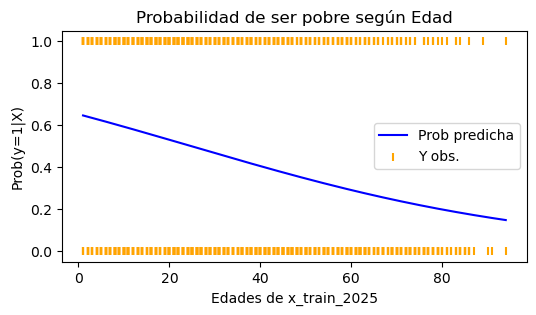

In [64]:
# Gráfico de resultados
plt.figure(figsize=(6,3))

# Predicciones ordenadas (probabilidad)
y_pred_score_sorted = logit_model2.predict_proba(X_sorted.reshape(-1,1))[:,1]   

plt.plot(X_sorted, y_pred_score_sorted, color='blue', zorder=10, label='Prob predicha')
plt.scatter(x_train_2025_ch06, y_train_2025, color='orange', zorder=20, marker="|", label='Y obs.' )
plt.xlabel('Edades de x_train_2025')
plt.ylabel('Prob(y=1|X)')
plt.legend()
plt.title('Probabilidad de ser pobre según Edad')
plt.show()

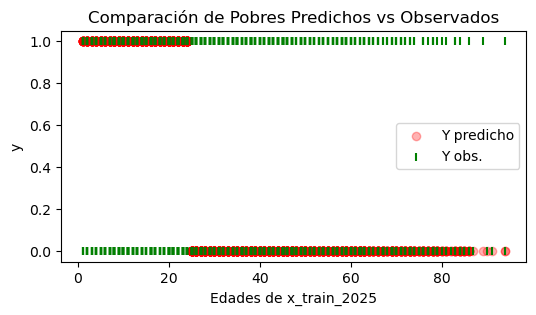

In [65]:
# Con este grafico visualizamos 'y' observado e 'y' predicho
plt.figure(figsize=(6, 3))

plt.scatter(x_train_2025_ch06, y_pred_score_sm, color='red', alpha=0.3, zorder=20, label='Y predicho')

plt.scatter(x_train_2025_ch06, y_train_2025, color='green', zorder=20, marker="|", label='Y obs.')

plt.xlabel('Edades de x_train_2025')
plt.ylabel('y')
plt.legend()

plt.title('Comparación de Pobres Predichos vs Observados')
plt.show()

In [ ]:
C. Método de Vecinos Cercanos (KNN)
5.	Estimación: Clasifiquen a las observaciones como “pobre”/“no pobre” en su región con Vecinos Cercanos (KNN) usando  K={1,5,10} 
para su matriz x_train de respondieron_2025. Expliquen en no más de 2-3 oraciones cómo la elección de K se relaciona con el trade-off sesgo varianza.  

6.	Visualización: Grafiquen dos características numéricas de su matriz x_train y visualicen las clases predichas por KNN usando con K=(1,10) 
con su frontera por clase “pobre”/“no pobre”.

7.	K optimo por Cross-validation: Dividan la base x_train de respondieron_2025 en 5 partes (5-fold) para obtener el K óptimo por 
Cross-Validation con K=(1,10). Llamenle a este modelo KNN con K-CV. 
Grafiquen el accuracy de cada modelo y comenten cual es el número óptimo de vecinos cercanos para identificar pobres.


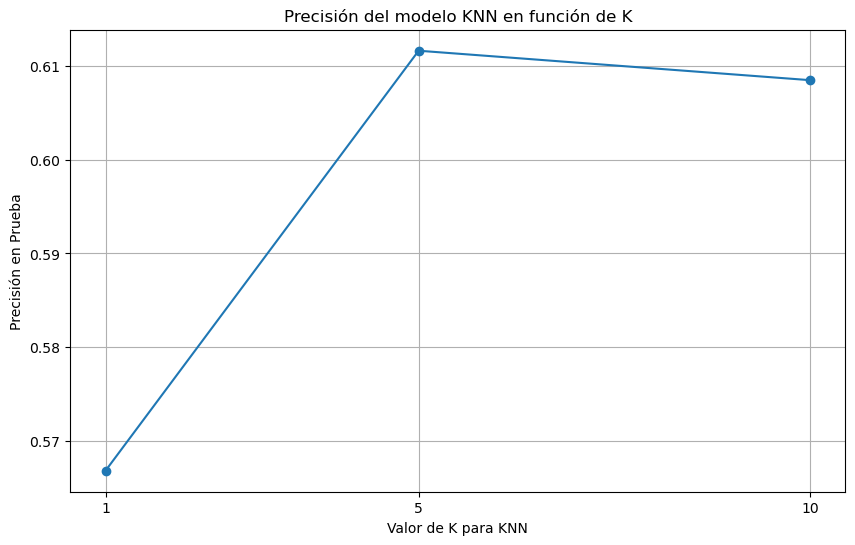

In [98]:


# Definimos k_range
k_range = [1, 5, 10]
scores_list = []

# Entrenamos el modelo y calculamos la precisión para cada k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_2025, y_train_2025)
    y_test_pred_knn = knn.predict(x_test_2025)  # Predicciones
    
    # Asegúrate de que y_test_2025 y y_test_pred_knn sean unidimensionales
    y_test_2025 = y_test_2025.ravel()  # Convertir a array unidimensional si es necesario
    y_test_pred_knn = y_test_pred_knn.ravel()  # Esto debería funcionar si y_test_pred_knn es un array de NumPy
    
    # Calcula la precisión
    accuracy = accuracy_score(y_test_2025, y_test_pred_knn)
    scores_list.append(accuracy)  # Agrega la precisión a la lista

# Graficamos la precisión en base a la cantidad de vecinos
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores_list, marker='o')  # Agrega marcadores para mejor visualización
plt.title('Precisión del modelo KNN en función de K')
plt.xlabel('Valor de K para KNN')
plt.ylabel('Precisión')
plt.xticks(k_range)  # Asegúrate de mostrar todos los valores de k
plt.grid()  # Opcional: Agrega una cuadrícula para facilitar la lectura
plt.show()  # Muestra el gráfico


In [99]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_2025.astype(float), y_train_2025.astype(float))

KNeighborsClassifier()